In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.metrics import mean_squared_error

from streamlight_functions import *

path_data_test = './data_test_streamlight/'

# Information for the test example
We will use a test example run with the original implementation of Streamlight in R. The inpit variables describing the channel are prescribed. Also, we load the input data (i.e., the driver) and output from the test example. Note that we also include intermediate results to evaluate key functions implemented inside Streamlight.

In [40]:
# Channel characteristics 
lat = 35.9925
lon = -79.0460
channel_azimuth = 330
bottom_width = 18.9
bh = 0.1
bs = 100
wl = 0.1
th = 23
overhang = 2.3
overhang_height = np.nan
x_LAD = 1

# Files with the drivers and results
input_data_test_streamlight_df = pd.read_csv(os.path.join(path_data_test,'input_data_test_streamlight.csv'))
# input_data_test_streamlight_df.head()
results_test_streamlight_df = pd.read_csv(os.path.join(path_data_test,'results_test_streamlight.csv'))
# results_test_streamlight_df.head()
test_solar_geo_calc_df = pd.read_csv(os.path.join(path_data_test,'input_data_test_solar_geo_calc.csv'))
# test_solar_geo_calc_df.head()

# Extract information from drivers
doy = input_data_test_streamlight_df['DOY'].values
hour = input_data_test_streamlight_df['Hour'].values
tz_offset = input_data_test_streamlight_df['offset'].values


# Test streamlight functions

In [43]:
def plot_comparison(var_name, ax):
    rmse_solar_dec = mean_squared_error(eval(var_name+'_true'),eval(var_name), squared=False)
    ax.plot(eval(var_name+'_true'),eval(var_name+'_true'),'-k')
    ax.scatter(eval(var_name+'_true'),eval(var_name), c = 'red', alpha=.1, s=1)
    ax.set_aspect('equal')
    the_title = '{vname}, (RMSE = {vrmse:.0e})'
    ax.set_title(the_title.format(vname=var_name,vrmse=rmse_solar_dec), loc='left')
    ax.set_xlabel('From StreamLight')
    ax.set_ylabel('Estimate WW')


## Test `solar_geo_calc`

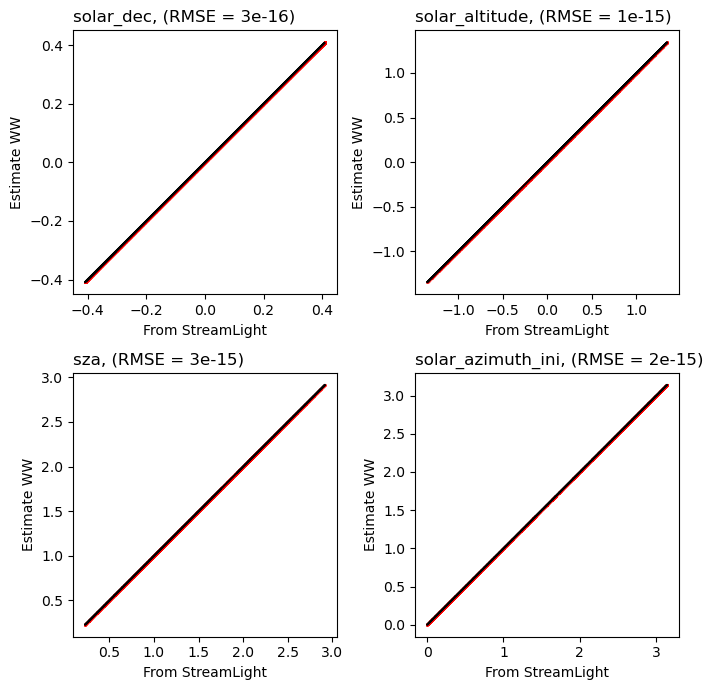

In [44]:
solar_dec, solar_altitude, sza, solar_azimuth_ini = solar_geo_calc(doy, hour, tz_offset, lat, lon)

solar_dec_true = test_solar_geo_calc_df['solar_dec'].values
solar_altitude_true = test_solar_geo_calc_df['solar_altitude'].values
sza_true = test_solar_geo_calc_df['SZA'].values
solar_azimuth_ini_true = test_solar_geo_calc_df['solar_azimuth2'].values

fig, ax = plt.subplots(2,2, figsize=(7,7))
ax = ax.flatten()

plot_comparison('solar_dec', ax[0])
plot_comparison('solar_altitude', ax[1])
plot_comparison('sza', ax[2])
plot_comparison('solar_azimuth_ini', ax[3])
plt.tight_layout()#(pad=0.4, w_pad=0.5, h_pad=1.0)

In [12]:
rmse_solar_dec

2.6307408432687047e-16